In [37]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import cv2
import sys
sys.path.append(".")
sys.path.append("..")
from datasetloader.data_loader_MSRAHT import MSRA_HT
from utils.hand_detector import HandDetector

In [55]:
path = 'D:/datasets/cvpr14_MSRAHandTrackingDB/cvpr14_MSRAHandTrackingDB'
hand_dataset = MSRA_HT(path)
import os

In [58]:
for i in range(len(hand_dataset)):
    path_ = os.path.join('D:/sfGesture/target', '%5d.png' % (i))
    dp = hand_dataset.get_depth(i)
    fx = fy = 241.42
    hd = HandDetector(dp, fx, fy)
    com = hd.calculateCoM(dp)
    bound = hd.comToBounds(com, (200,200,200))
    cropped = hd.getCrop(dp, *bound)
    cropped /= np.max(cropped)
    cropped_resize = cv2.resize(cropped, (224,224))
    fig = plt.figure(1, figsize=[6, 6])
    plt.imshow(cropped, cmap='gray')
    plt.axis('off')
    fig.savefig(path_)
    plt.close(fig)

In [60]:
print(np.min(cropped))

0.0


In [51]:
dp = hand_dataset.get_depth(224)
fx = fy = 241.42
hd = HandDetector(dp, fx, fy)
com = hd.calculateCoM(dp)
bound = hd.comToBounds(com, (200,200,200))
cropped = hd.getCrop(dp, *bound)

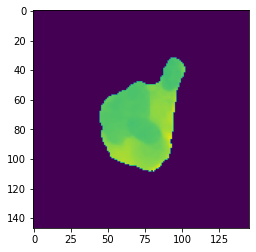

In [52]:
plt.figure()
plt.imshow(cropped)
plt.show()

In [54]:
print(np.max(cropped))

423.5
